## E-waste classification Using Machine Learning
## Model: EfficientNetV2B2, ResNet50

In [1]:
import tensorflow as tf  
from tensorflow.keras import layers, models, optimizers, callbacks  
from tensorflow.keras.models import Sequential, load_model  
from tensorflow.keras.applications import EfficientNetV2B0  
from tensorflow.keras.applications.efficientnet import preprocess_input 
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns  
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.applications import EfficientNetV2B2, MobileNetV2, ResNet50
import os
from PIL import Image

## Dataset Analysis

In [2]:
dataset_path = r"C:\Users\Kanishk Pareek\Downloads\archive\modified-dataset"
train_path = r"C:\Users\Kanishk Pareek\Downloads\archive\modified-dataset\train"
test_path = r"C:\Users\Kanishk Pareek\Downloads\archive\modified-dataset\test"
val_path = r"C:\Users\Kanishk Pareek\Downloads\archive\modified-dataset\val"

# Retrieve the names of all folders in the Train dataset
garbage_types = os.listdir(train_path)
for garbage_type in garbage_types:
    folder_path = os.path.join(train_path, garbage_type)
    if os.path.isdir(folder_path):
        image_files = [f for f in os.listdir(folder_path) if f.endswith(('jpg', 'jpeg'))]
        # For displaying the count of images in the current folder
        num_images = len(image_files)
        print(f"{garbage_type} folder contains {num_images} images.")

print("-" * 40)  

# Retrieve the names of all folders in the Test dataset
garbage_types = os.listdir(test_path)
for garbage_type in garbage_types:
    folder_path = os.path.join(test_path, garbage_type)
    if os.path.isdir(folder_path):
        image_files = [f for f in os.listdir(folder_path) if f.endswith(('jpg', 'jpeg'))]
        # For displaying the count of images in the current folder
        num_images = len(image_files)
        print(f"{garbage_type} folder contains {num_images} images.")

print("-" * 40)          

# Retrieve the names of all folders in the val dataset
garbage_types = os.listdir(val_path)
for garbage_type in garbage_types:
    folder_path = os.path.join(val_path, garbage_type)
    if os.path.isdir(folder_path):
        image_files = [f for f in os.listdir(folder_path) if f.endswith(('jpg', 'jpeg'))]
        # For displaying the count of images in the current folder
        num_images = len(image_files)
        print(f"{garbage_type} folder contains {num_images} images.")

Battery folder contains 240 images.
Keyboard folder contains 240 images.
Microwave folder contains 240 images.
Mobile folder contains 240 images.
Mouse folder contains 240 images.
PCB folder contains 240 images.
Player folder contains 240 images.
Printer folder contains 240 images.
Television folder contains 240 images.
Washing Machine folder contains 240 images.
----------------------------------------
Battery folder contains 30 images.
Keyboard folder contains 30 images.
Microwave folder contains 30 images.
Mobile folder contains 30 images.
Mouse folder contains 30 images.
PCB folder contains 30 images.
Player folder contains 30 images.
Printer folder contains 30 images.
Television folder contains 30 images.
Washing Machine folder contains 30 images.
----------------------------------------
Battery folder contains 30 images.
Keyboard folder contains 30 images.
Microwave folder contains 30 images.
Mobile folder contains 30 images.
Mouse folder contains 30 images.
PCB folder contains 3

In [3]:
datatrain= tf.keras.utils.image_dataset_from_directory(train_path,shuffle = True, image_size = (128,128), batch_size = 32, validation_split= False)

Found 2400 files belonging to 10 classes.


In [4]:
datatest=tf.keras.utils.image_dataset_from_directory(test_path,shuffle = False, image_size = (128,128), batch_size = 32, validation_split= False)

Found 300 files belonging to 10 classes.


In [5]:
datavalid = tf.keras.utils.image_dataset_from_directory(val_path,shuffle = True, image_size = (128,128), batch_size = 32, validation_split= False)

Found 300 files belonging to 10 classes.


Battery folder contains 240 images.


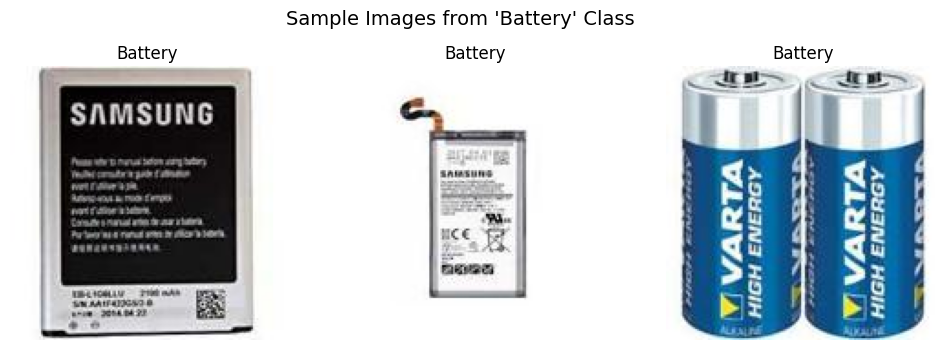

Keyboard folder contains 240 images.


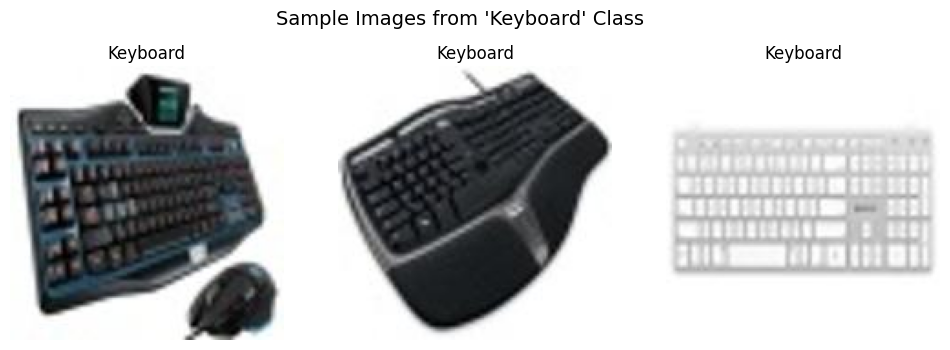

Microwave folder contains 240 images.


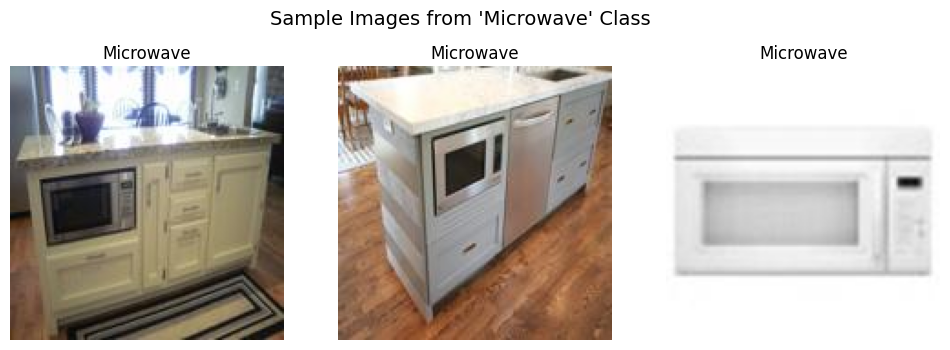

Mobile folder contains 240 images.


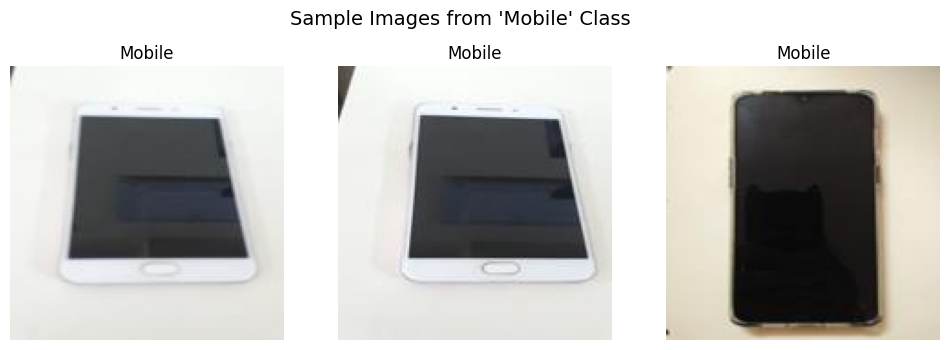

Mouse folder contains 240 images.


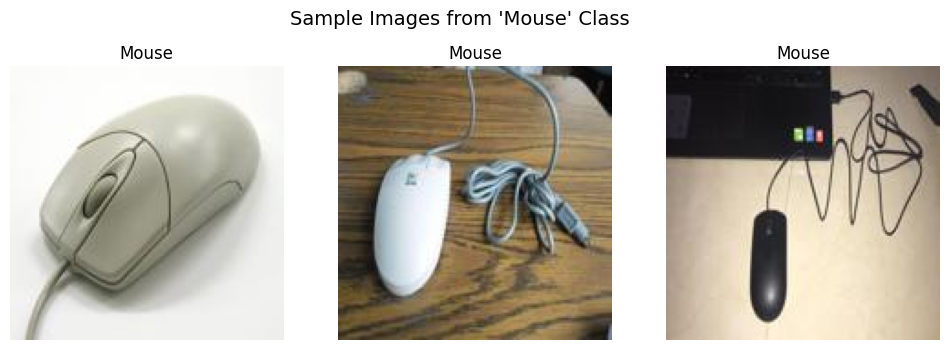

PCB folder contains 240 images.


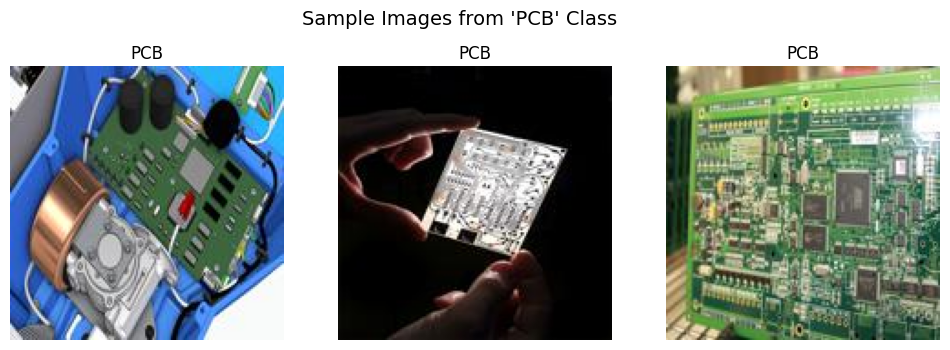

Player folder contains 240 images.


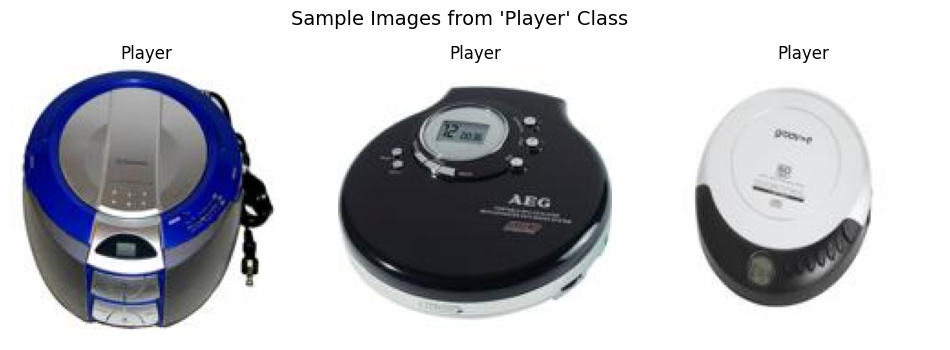

Printer folder contains 240 images.


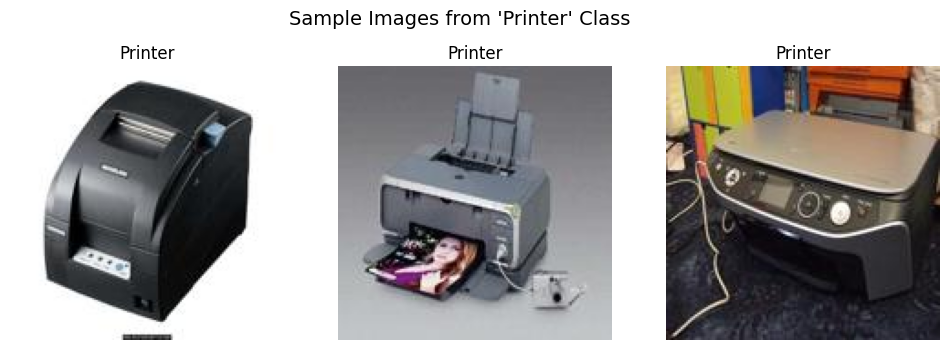

Television folder contains 240 images.


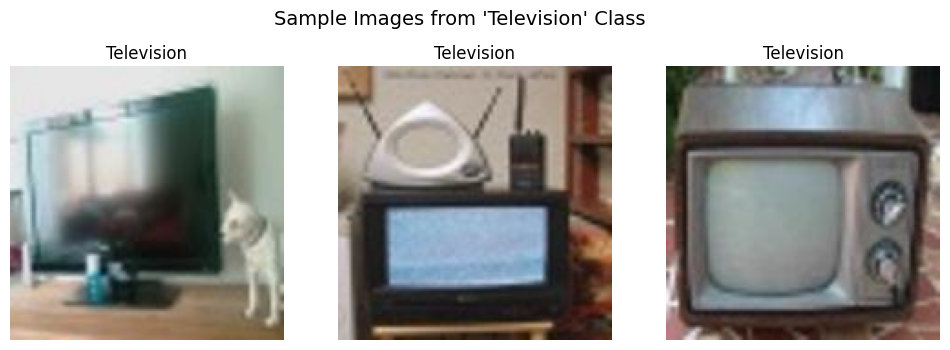

Washing Machine folder contains 240 images.


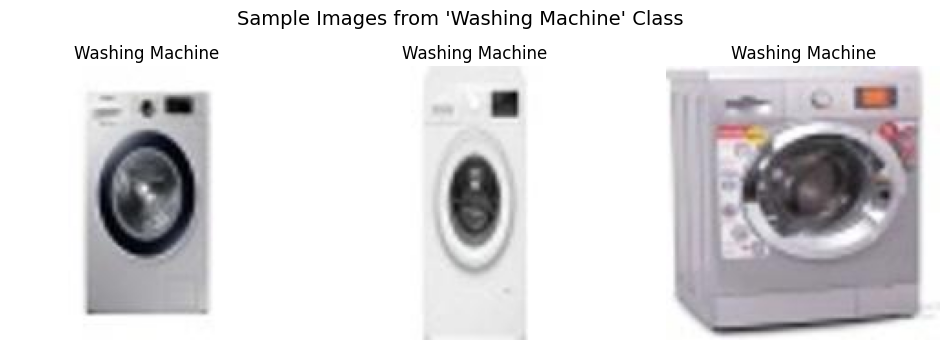

In [6]:
# Retrieve all folders (categories) in the train dataset
garbage_types = os.listdir(train_path)

# Displaying 3 sample images from each class
for garbage_type in garbage_types:
    folder_path = os.path.join(train_path, garbage_type)
    if os.path.isdir(folder_path):
        image_files = [f for f in os.listdir(folder_path) if f.endswith(('jpg', 'jpeg', 'png'))]
        num_images = len(image_files)
        print(f"{garbage_type} folder contains {num_images} images.")

        # Display up to 3 images from each class
        sample_images = image_files[:3]

        plt.figure(figsize=(12, 4))
        for i, image_file in enumerate(sample_images):
            img_path = os.path.join(folder_path, image_file)
            img = Image.open(img_path)
            plt.subplot(1, 3, i + 1)
            plt.imshow(img)
            plt.title(garbage_type)
            plt.axis('off')
        plt.suptitle(f"Sample Images from '{garbage_type}' Class", fontsize=14)
        plt.show()

In [7]:
import os

def get_class_distribution_percent(data_path):
    """
    Calculates the percentage distribution of image classes in a given dataset split.

    Args:
        data_path (str): Path to dataset split (e.g., train_path, test_path, val_path)

    Returns:
        dict: {class_name: percentage of total images (rounded to 2 decimals)}
    """
    class_counts = {}
    total_images = 0

    # Loop through each class folder
    for class_name in os.listdir(data_path):
        folder_path = os.path.join(data_path, class_name)
        if os.path.isdir(folder_path):
            image_files = [f for f in os.listdir(folder_path) if f.lower().endswith(('jpg', 'jpeg'))]
            count = len(image_files)
            class_counts[class_name] = count
            total_images += count

    # Convert counts to percentages
    class_percentages = {
        class_name: round((count / total_images) * 100, 2)
        for class_name, count in class_counts.items()
    }

    return class_percentages


In [8]:
train_percent = get_class_distribution_percent(train_path)
test_percent = get_class_distribution_percent(test_path)
val_percent = get_class_distribution_percent(val_path)

print("Train Class Distribution (%):")
print(train_percent)
print("-" * 40)

print("Test Class Distribution (%):")
print(test_percent)
print("-" * 40)

print("Validation Class Distribution (%):")
print(val_percent)


Train Class Distribution (%):
{'Battery': 10.0, 'Keyboard': 10.0, 'Microwave': 10.0, 'Mobile': 10.0, 'Mouse': 10.0, 'PCB': 10.0, 'Player': 10.0, 'Printer': 10.0, 'Television': 10.0, 'Washing Machine': 10.0}
----------------------------------------
Test Class Distribution (%):
{'Battery': 10.0, 'Keyboard': 10.0, 'Microwave': 10.0, 'Mobile': 10.0, 'Mouse': 10.0, 'PCB': 10.0, 'Player': 10.0, 'Printer': 10.0, 'Television': 10.0, 'Washing Machine': 10.0}
----------------------------------------
Validation Class Distribution (%):
{'Battery': 10.0, 'Keyboard': 10.0, 'Microwave': 10.0, 'Mobile': 10.0, 'Mouse': 10.0, 'PCB': 10.0, 'Player': 10.0, 'Printer': 10.0, 'Television': 10.0, 'Washing Machine': 10.0}


In [9]:
def plot_class_distribution(percent_dict, title="Class Distribution (%)"):
    """
    Plots a bar chart of class distribution percentages.

    Args:
        percent_dict (dict): class_name -> percentage
        title (str): Title of the plot
    """
    labels = list(percent_dict.keys())
    percentages = list(percent_dict.values())

    plt.figure(figsize=(10, 5))
    plt.bar(labels, percentages, color='skyblue')
    plt.ylabel("Percentage (%)")
    plt.title(title)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

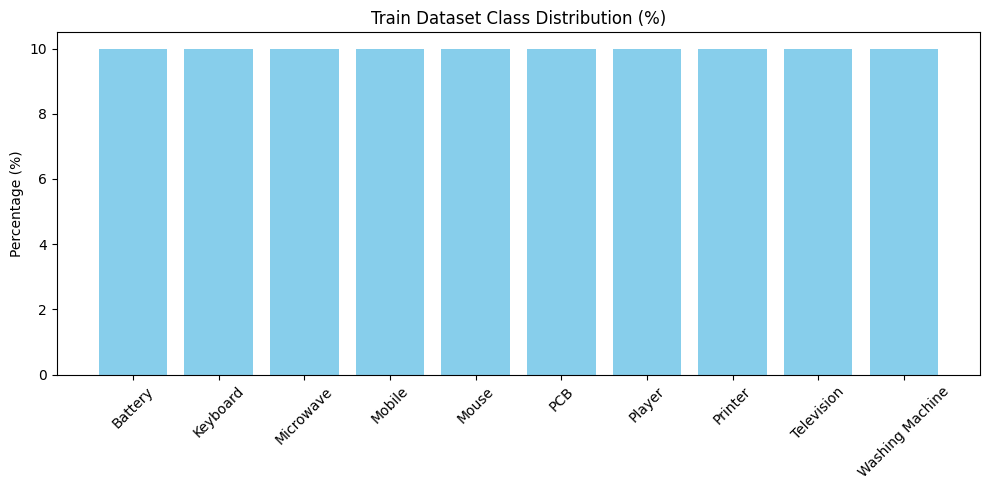

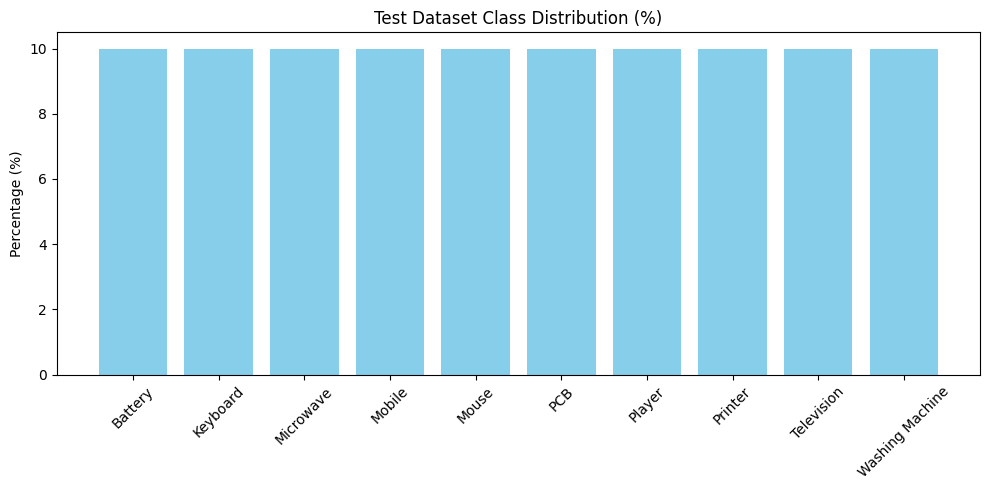

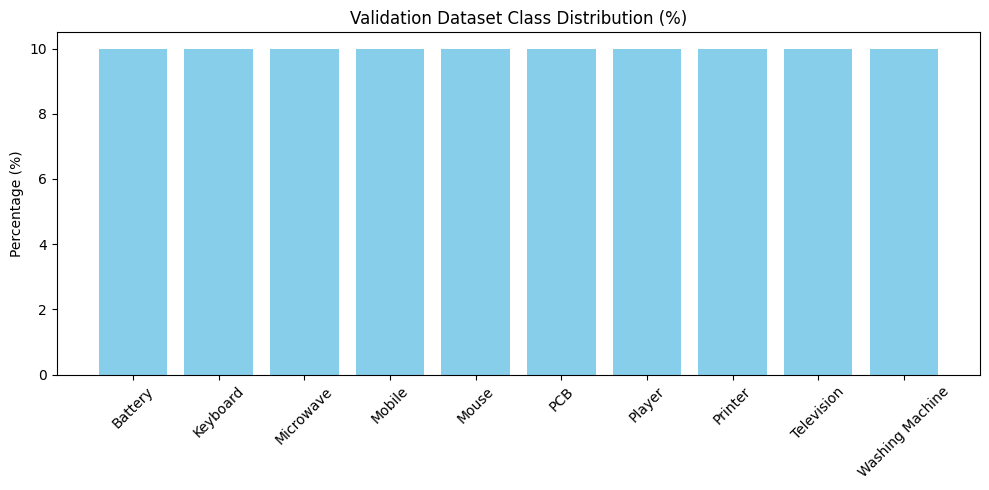

In [10]:
plot_class_distribution(train_percent, "Train Dataset Class Distribution (%)")
plot_class_distribution(test_percent, "Test Dataset Class Distribution (%)")
plot_class_distribution(val_percent, "Validation Dataset Class Distribution (%)")

## Data Augmetation

In [11]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom(0.1),
])

## Model Training(EfficientNetV2B2)

In [12]:
base_model = tf.keras.applications.EfficientNetV2B2(
    input_shape=(128, 128, 3),
    include_top=False,
    weights='imagenet'
)
base_model.trainable = True
for layer in base_model.layers[:100]:
    layer.trainable = False

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(128, 128, 3)),
    data_augmentation,
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),loss = tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['Accuracy'])

In [14]:
# Define an EarlyStopping callback to stop training when validation loss stops improving
early = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',            # Metric to monitor (validation loss here)
    patience=3,                   # Stop training if there's no improvement after this 3 epochs
    restore_best_weights=True     # After stopping, restore the model weights from the epoch with the best val_loss
)

In [15]:
# Set the number of epochs
epochs = 20

# Train the model on the training dataset 'datatrain'
history = model.fit(
    datatrain,                      # Training data generator or dataset
    validation_data=datavalid,      # Validation data generator or dataset
    epochs=epochs,                  # Number of training epochs
    batch_size=30,                 # Number of samples per gradient update
    callbacks=[early],
    verbose = 1                    # List of callbacks to apply during training (e.g., early stopping)
)

Epoch 1/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 64s 535ms/step - Accuracy: 0.2535 - loss: 2.1132 - val_Accuracy: 0.8333 - val_loss: 1.0403
Epoch 2/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 41s 542ms/step - Accuracy: 0.8082 - loss: 0.9550 - val_Accuracy: 0.9167 - val_loss: 0.4449
Epoch 3/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 39s 514ms/step - Accuracy: 0.8839 - loss: 0.4577 - val_Accuracy: 0.9367 - val_loss: 0.2626
Epoch 4/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 39s 526ms/step - Accuracy: 0.9048 - loss: 0.3233 - val_Accuracy: 0.9467 - val_loss: 0.1993
Epoch 5/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 40s 529ms/step - Accuracy: 0.9397 - loss: 0.2333 - val_Accuracy: 0.9533 - val_loss: 0.1673
Epoch 6/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 41s 552ms/step - Accuracy: 0.9546 - loss: 0.1583 - val_Accuracy: 0.9533 - val_loss: 0.1545
Epoch 7/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 41s 544ms/step - Accuracy: 0.9610 - loss: 0.1378 - val_Accuracy: 0.9633 - val_loss: 0.1542
Epoch 8/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 45s 594ms/step - Accuracy: 0.9786 - loss: 0.0879 - val_Accu

In [16]:
model.summary() 

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ efficientnetv2-b2 (Functional)  │ (None, 4, 4, 1408)     │     8,769,374 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1408)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1408)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │        14,090 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,744,022 (94.39 MB)

 Trainable params: 7,980,278 (30.44 MB)

 Non-trainable params: 803,186 (3.06 MB)

 Optimizer params: 15,960,558 (60.88 MB)

In [17]:
base_model.summary()

Model: "efficientnetv2-b2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling           │ (None, 128, 128,  │          0 │ input_layer[0][0] │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization       │ (None, 128, 128,  │          0 │ rescaling[0][0]   │
│ (Normalization)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv (Conv2D)  │ (None, 64, 64,    │        864 │ normalization[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn             │ (None, 64, 64,    │        128 │ stem_conv[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_activation     │ (None, 64, 64,    │          0 │ stem_bn[0][0]     │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_co… │ (None, 64, 64,    │      4,608 │ stem_activation[… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_bn  │ (None, 64, 64,    │         64 │ block1a_project_… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_ac… │ (None, 64, 64,    │          0 │ block1a_project_… │
│ (Activation)        │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1b_project_co… │ (None, 64, 64,    │      2,304 │ block1a_project_… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1b_project_bn  │ (None, 64, 64,    │         64 │ block1b_project_… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1b_project_ac… │ (None, 64, 64,    │          0 │ block1b_project_… │
│ (Activation)        │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1b_drop        │ (None, 64, 64,    │          0 │ block1b_project_… │
│ (Dropout)           │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1b_add (Add)   │ (None, 64, 64,    │          0 │ block1b_drop[0][… │
│                     │ 16)               │            │ block1a_project_… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2a_expand_conv │ (None, 32, 32,    │      9,216 │ block1b_add[0][0] │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2a_expand_bn   │ (None, 32, 32,    │        256 │ block2a_expand_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2a_expand_act… │ (None, 32, 32,    │          0 │ block2a_expand_b

 Total params: 8,769,374 (33.45 MB)

 Trainable params: 7,966,188 (30.39 MB)

 Non-trainable params: 803,186 (3.06 MB)

## Model Performance Visualization

In [18]:
# Plotting Training and Validation Accuracy and Loss Over Epochs

acc = history.history['Accuracy']           # Training accuracy
val_acc = history.history['val_Accuracy']   # Validation accuracy
loss = history.history['loss']              # Training loss
val_loss = history.history['val_loss']      # Validation loss

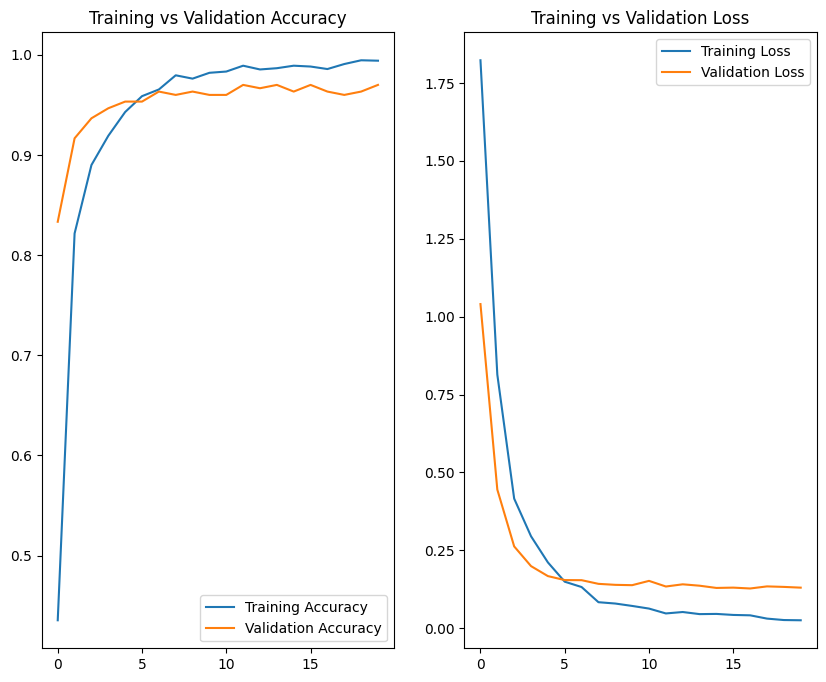

In [19]:
epochs_range = range(len(acc))              # X-axis range based on number of epochs

plt.figure(figsize=(10, 8))                 

plt.subplot(1, 2, 1)                        # 1 row, 2 columns, position 1
plt.plot(epochs_range, acc, label='Training Accuracy')       # training accuracy
plt.plot(epochs_range, val_acc, label='Validation Accuracy') # validation accuracy
plt.legend(loc='lower right')              
plt.title('Training vs Validation Accuracy') 

plt.subplot(1, 2, 2)                        # 1 row, 2 columns, position 2
plt.plot(epochs_range, loss, label='Training Loss')          # training loss
plt.plot(epochs_range, val_loss, label='Validation Loss')    # validation loss
plt.legend(loc='upper right')              
plt.title('Training vs Validation Loss')   

plt.show()                                  

## Model Evaluation (EfficientNetV2B2)

In [20]:
loss, accuracy = model.evaluate(datatest)
print(f'Test accuracy is{accuracy:.4f}, Test loss is {loss:.4f}')

10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 500ms/step - Accuracy: 0.9591 - loss: 0.1493
Test accuracy is0.9533, Test loss is 0.1532


In [21]:
# Evaluate Model Performance on Test Data using Confusion Matrix and Classification Report

# Extract true labels from all batches
y_true = np.concatenate([y.numpy() for x, y in datatest], axis=0)  # Ground truth labels

# Get predictions as probabilities and then predicted classes
y_pred_probs = model.predict(datatest)


y_pred = np.argmax(y_pred_probs, axis=1)                           


print(confusion_matrix(y_true, y_pred))                            
print(classification_report(y_true, y_pred))  

10/10 ━━━━━━━━━━━━━━━━━━━━ 10s 756ms/step
[[28  0  0  0  0  1  1  0  0  0]
 [ 0 30  0  0  0  0  0  0  0  0]
 [ 0  0 29  0  0  0  0  1  0  0]
 [ 0  0  0 30  0  0  0  0  0  0]
 [ 0  0  0  0 29  0  0  1  0  0]
 [ 0  0  0  0  0 28  2  0  0  0]
 [ 1  0  1  0  0  0 28  0  0  0]
 [ 1  0  0  0  0  1  0 28  0  0]
 [ 0  0  2  0  0  0  2  0 26  0]
 [ 0  0  0  0  0  0  0  0  0 30]]
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        30
           1       1.00      1.00      1.00        30
           2       0.91      0.97      0.94        30
           3       1.00      1.00      1.00        30
           4       1.00      0.97      0.98        30
           5       0.93      0.93      0.93        30
           6       0.85      0.93      0.89        30
           7       0.93      0.93      0.93        30
           8       1.00      0.87      0.93        30
           9       1.00      1.00      1.00        30

    accuracy                   

In [22]:
print(len(datatrain.class_names))
class_names = datatrain.class_names
print(class_names)

10
['Battery', 'Keyboard', 'Microwave', 'Mobile', 'Mouse', 'PCB', 'Player', 'Printer', 'Television', 'Washing Machine']


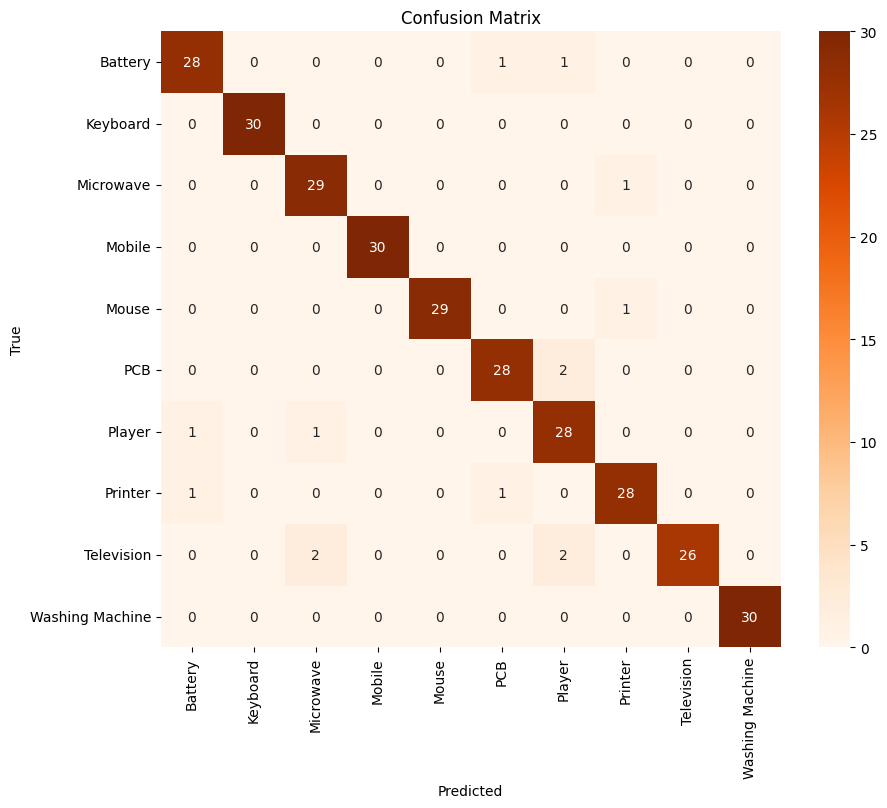

In [23]:
### Plot Confusion Matrix as Heatmap for Visualization

cm = confusion_matrix(y_true, y_pred)                                     
                                                     

plt.figure(figsize=(10, 8))                                               
sns.heatmap(cm, annot=True, fmt='d', 
            xticklabels=class_names, 
            yticklabels=class_names, 
            cmap='Oranges')                                                 

plt.xlabel('Predicted')                                                   
plt.ylabel('True')                                                        
plt.title('Confusion Matrix')                                             
plt.show()                                                                


## Final Testing of the Model(Predicting Images)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


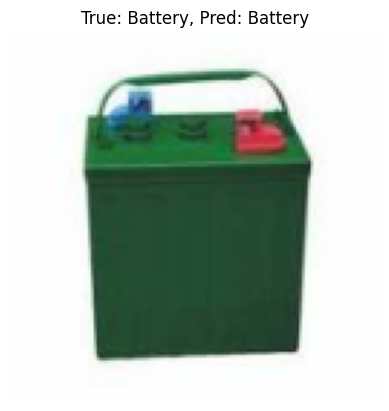

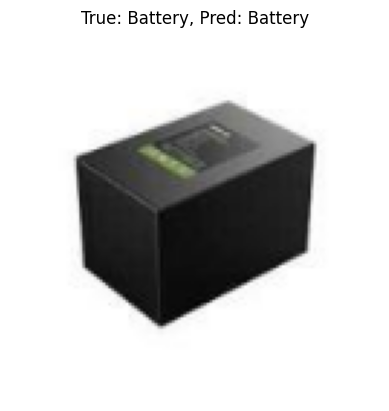

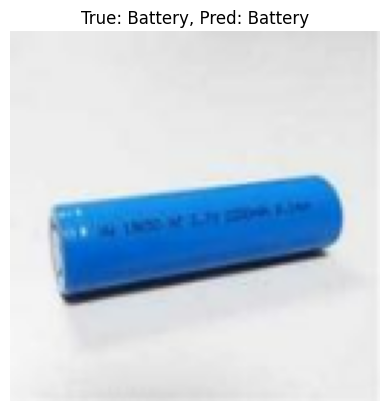

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step


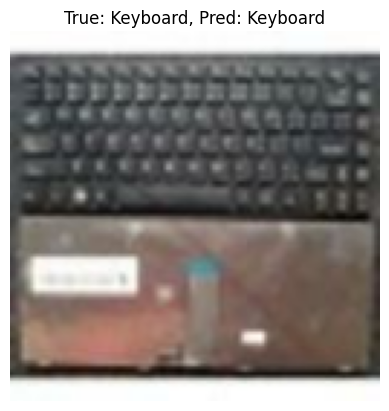

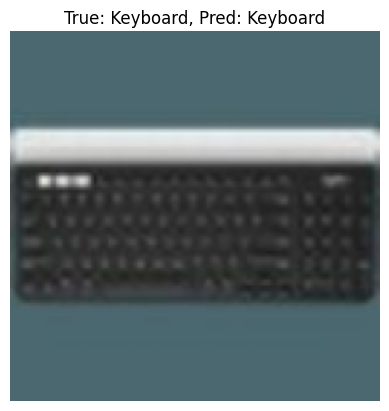

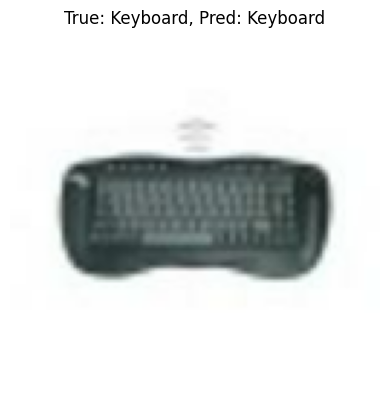

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


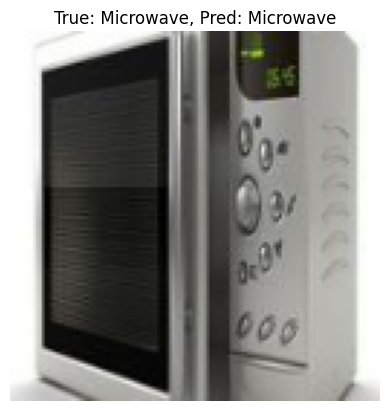

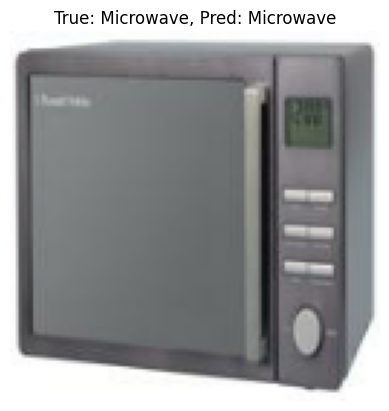

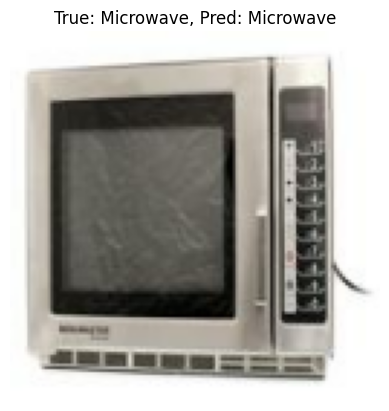

In [24]:
### Display Sample Predictions: True Labels vs Predicted Labels

class_names = datatest.class_names                                           # Get class names from test dataset

for images, labels in datatest.take(3):                                     # Take 2 batch from test data
    predictions = model.predict(images)                                     # Predicting class probabilities
    pred_labels = tf.argmax(predictions, axis=1)                            # Get predicted class indices

    for i in range(3):                                                      # Display first 3 images from batch
        plt.imshow(images[i].numpy().astype("uint8"))                       # Convert tensor to image
        plt.title(f"True: {class_names[labels[i]]}, Pred: {class_names[pred_labels[i]]}")  
        plt.axis("off")                                                     
        plt.show()                                                          


## Using Resnet50

In [25]:
Resnet50_model = tf.keras.applications.ResNet50(
    input_shape=(128, 128, 3),
    include_top=False,
    weights='imagenet'
)

base_model.trainable = True  # Allow training


for layer in Resnet50_model.layers[:100]:
    layer.trainable = False


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 7s 0us/step


In [31]:
model_2 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(128, 128, 3)),
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='softmax')  # for 10 classes
])

model_2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),loss = tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['Accuracy'])

In [32]:
early = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

In [33]:
# Set the number of training epochs
epochs = 20

# Train the model using the training and validation datasets
history = model.fit(
    datatrain,                      # Training dataset
    validation_data=datavalid,      # Validation dataset to monitor performance
    epochs=epochs,                  # Train for up to 20 epochs
    batch_size=30,                  # Number of samples per training step
    callbacks=[early],              # Stop early if validation loss doesn’t improve
    verbose=1                       # Print training progress
)

Epoch 1/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 37s 498ms/step - Accuracy: 0.9949 - loss: 0.0200 - val_Accuracy: 0.9633 - val_loss: 0.1378
Epoch 2/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 38s 512ms/step - Accuracy: 0.9962 - loss: 0.0190 - val_Accuracy: 0.9700 - val_loss: 0.1384
Epoch 3/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 38s 504ms/step - Accuracy: 0.9961 - loss: 0.0176 - val_Accuracy: 0.9667 - val_loss: 0.1532
Epoch 4/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 38s 513ms/step - Accuracy: 0.9947 - loss: 0.0204 - val_Accuracy: 0.9700 - val_loss: 0.1353
Epoch 5/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 39s 519ms/step - Accuracy: 0.9943 - loss: 0.0237 - val_Accuracy: 0.9667 - val_loss: 0.1397
Epoch 6/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 40s 527ms/step - Accuracy: 0.9971 - loss: 0.0140 - val_Accuracy: 0.9633 - val_loss: 0.1444
Epoch 7/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 40s 537ms/step - Accuracy: 0.9953 - loss: 0.0196 - val_Accuracy: 0.9600 - val_loss: 0.1387
Epoch 8/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 40s 536ms/step - Accuracy: 0.9934 - loss: 0.0196 - val_Accu

In [29]:
# Plotting Training and Validation Accuracy and Loss Over Epochs

acc = history.history['Accuracy']           # Training accuracy
val_acc = history.history['val_Accuracy']   # Validation accuracy
loss = history.history['loss']              # Training loss
val_loss = history.history['val_loss']      # Validation loss

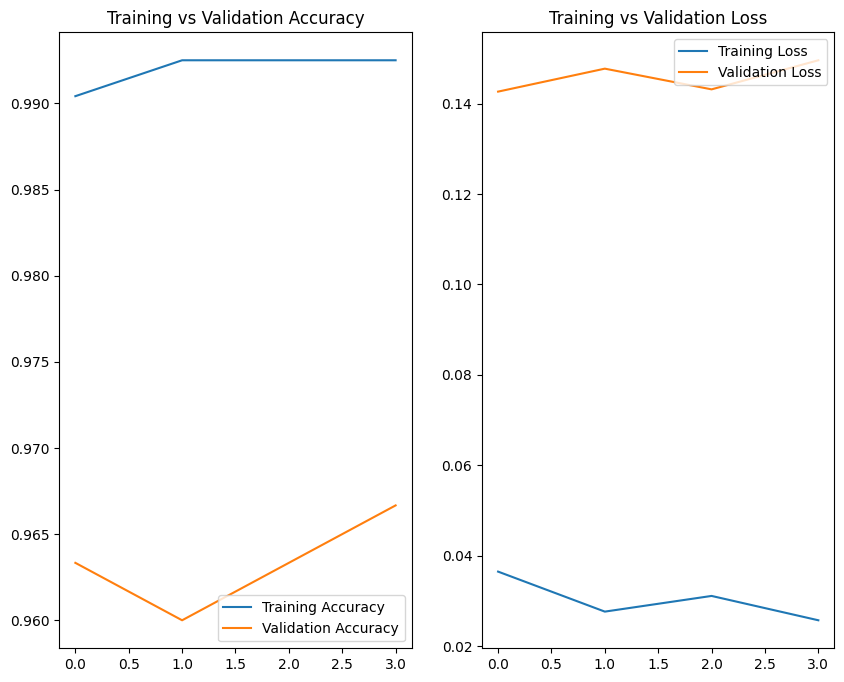

In [30]:
epochs_range = range(len(acc))              # X-axis range based on number of epochs

plt.figure(figsize=(10, 8))                 

plt.subplot(1, 2, 1)                        # 1 row, 2 columns, position 1
plt.plot(epochs_range, acc, label='Training Accuracy')       # training accuracy
plt.plot(epochs_range, val_acc, label='Validation Accuracy') # validation accuracy
plt.legend(loc='lower right')              
plt.title('Training vs Validation Accuracy') 

plt.subplot(1, 2, 2)                        # 1 row, 2 columns, position 2
plt.plot(epochs_range, loss, label='Training Loss')          # training loss
plt.plot(epochs_range, val_loss, label='Validation Loss')    # validation loss
plt.legend(loc='upper right')              
plt.title('Training vs Validation Loss')   

plt.show()      

In [34]:
model.save('Best_model.keras')